# Predicting heart disease using machine learning

This notebook look into various python-based machine learning and data science libraries in attempt to build a machine learning model capable of predicting whether or not some one has heart disease  based on thier medical attributes

We are going to take the following approach:
1. Problem Definnition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statment ,
> Given clinical paramters about , can we predict whether or not they have heart_disease?
## 2. Data 
Th orignal data came form Cleavlend data from UCI Machine Learning Repository.
There is also a a verison avaliable on Kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv
## 3. Evaluation
 > If  we can reach 95 % accuracy in predicting whether the patient have heart disase or not then we will presure the project

## 4. Features
This is where you get different information about each of the features  in your data

** Create the data dictionary **

* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission     to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
 -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target -have disease or not(1=yes 0=no)(= the predicted attribute)



## Preparing the tools
we are goiong to  use pandas matplotlib and numpy for the data  annalysis and manipulation

In [104]:
# import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model from sklearn
from sklearn.linear_model import  LogisticRegression
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score ,recall_score,f1_score
from sklearn.metrics import roc_curve,auc



In [42]:
df=pd.read_csv("data/157 - heart-disease.csv")
df.shape# (rows columns)

(303, 14)

## Data Exploration (exploratory data annalysis or EDA)
The goal here to find out more about the data and become a subject matter export on the datset you are working with
1. What question are you trying to solve ?
2. What kind of data do we have and how do we treat differnet types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliners and why should you cae abour them?
5. How can you add change or remove features to get more out of your data?

In [43]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [45]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

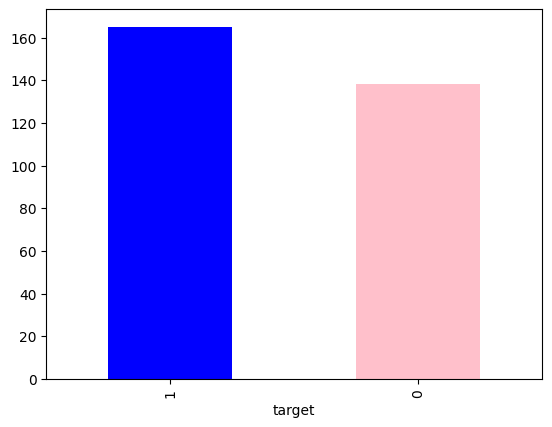

In [46]:
df['target'].value_counts().plot(kind="bar",color=["blue","pink"]);

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [50]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [51]:
# compare target with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


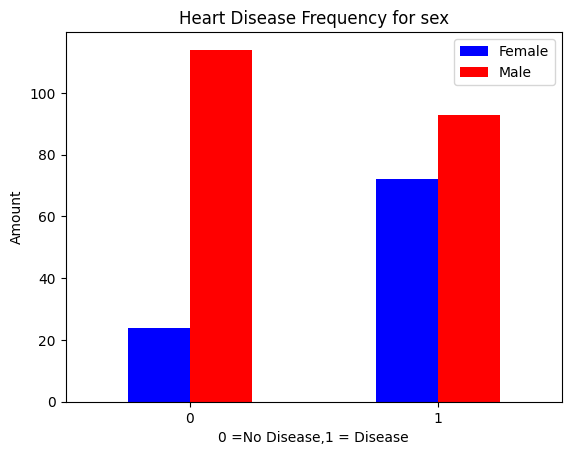

In [52]:
# Create the plot of cross tab
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["blue","red"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 =No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [53]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [54]:
# compare target with thalach
pd.crosstab(df.target,df.thalach)

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
target,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,1,1,2,1,1,1,1,1,0,1


# Age vs. Max Heart Rate for Heart Disease


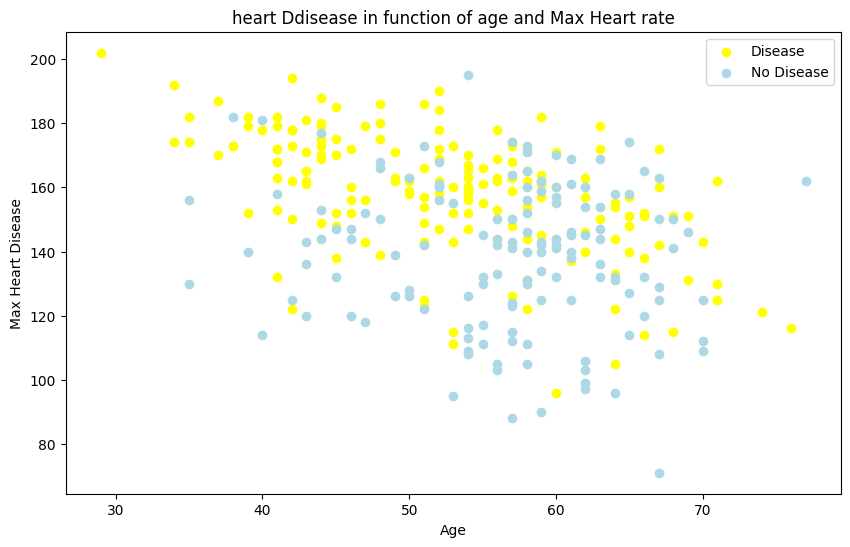

In [55]:
# Create another figure
plt.figure(figsize=(10,6))
# actter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="yellow");
# scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");
# Add some helpful inifo 
plt.title("heart Ddisease in function of age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Disease")
plt.legend(["Disease","No Disease"]);

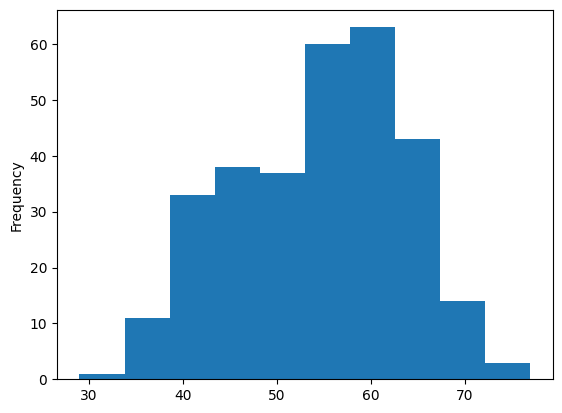

In [56]:
# check the distribution of the age column wih a histogram
df.age.plot.hist();

 ## Heart Disease Frequency  per Chest pain Type
3. cp chest pain type
   * 0 Typical agina : chest pain related decrease blood supply to heart
   * 1 Atypicacl agina: chest pain not related to heart
   * 2 Non Aginal pain: typically esophageal spasms (non hear related)
   * 3 Asympllotmatic : chest pain not showing signs of disease 

In [57]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


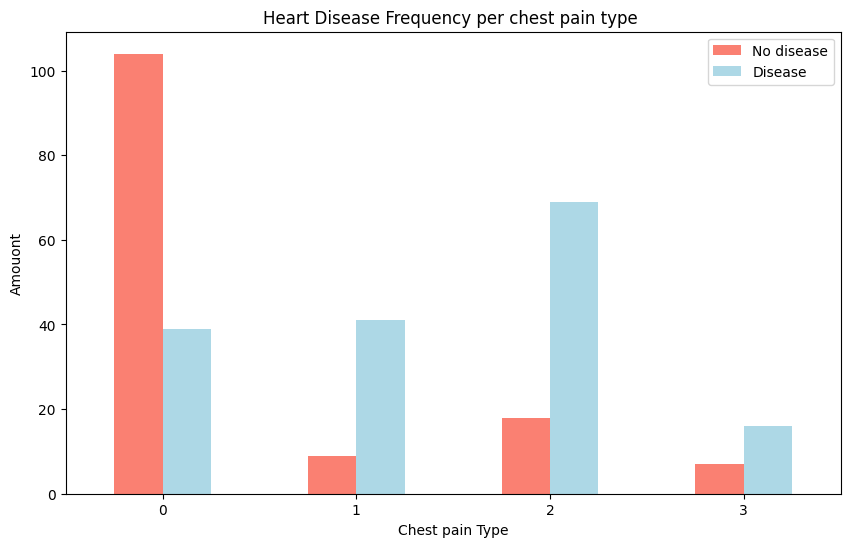

In [58]:
# make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
 # add some communication
plt.title("Heart Disease Frequency per chest pain type ")
plt.xlabel("Chest pain Type")
plt.ylabel("Amouont")
plt.legend(["No disease","Disease"]);
plt.xticks(rotation=0);


In [59]:
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [60]:
 #make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


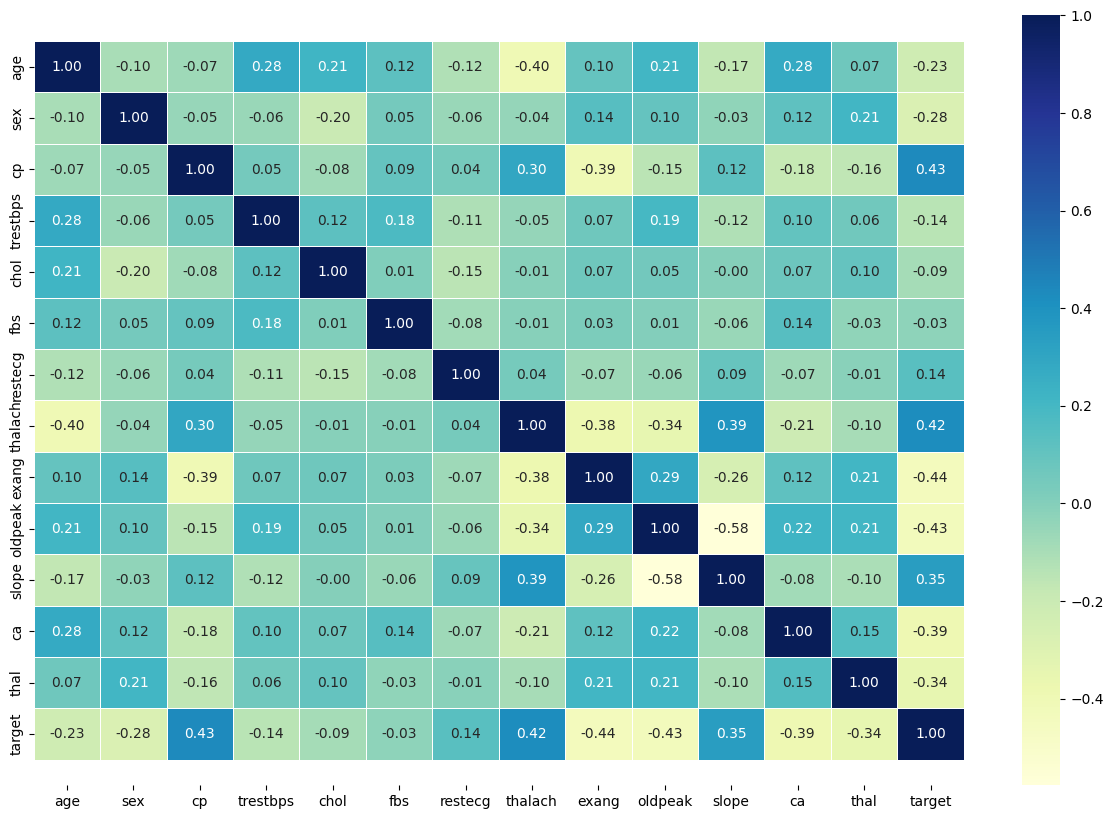

In [61]:
#let make our correlation mtrix a little prettier
corr_matrix =df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);

## 5. Modleing

In [62]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# spllir data into x and y
x=df.drop("target",axis=1)
y=df['target']


In [64]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [66]:
# split in train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [67]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we got our data split into taining and test it is time to built machine learning model

we'll train it (find the patterns) on the training set

and we'll test it (use the patterns on test set)
We are going to try 3 diffterent model:
* Logistic Regression
* K-Nearest Neighbour Classifier
* Random Forest Classifier
  

In [68]:
# put the model in dictionary
model={"Logistic Regression":LogisticRegression(),
      "KNN":KNeighborsClassifier(),
      "Random Forest":RandomForestClassifier()}
# Creatte a function to fit and score models
def fit_and_score(model,x_train,x_test,y_train,y_test):
    """
    fits and evalulates giben mamchine learning mdel
    
    """
    # set random forest
    np.random.seed(42)
    #Make a dictinary to keep model scores
    model_scores={}
    for name ,model in model.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score in model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [69]:
model_scores=fit_and_score(model,x_train,x_test,y_train,y_test)
model_scores


C:\Users\MUHAMMAD WALEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

<Axes: >

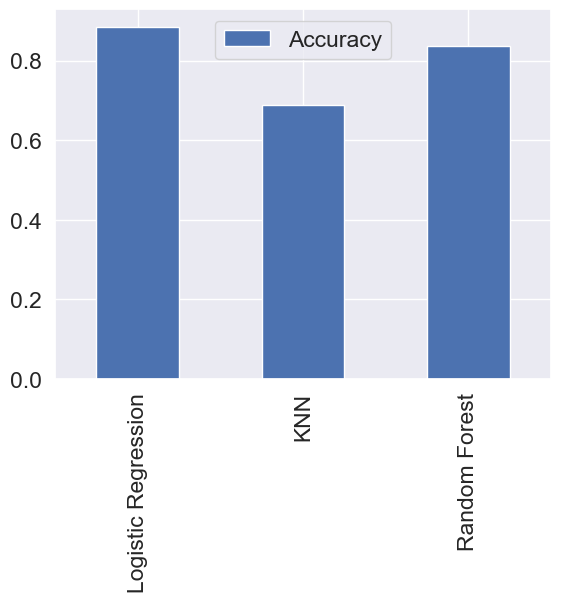

In [168]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()

Now we  got baseline model ... and we know our model first prediction are not always what we should based our next step off. What should do?
Lets look at the following
* Hypyter Parameters tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classifivation report
* ROC curve
* Are under the curve(AUC)
## HyperParamter tuning

In [71]:
# lets tune KNN
train_score = []
test_score = []

# Create a list of different values for n_neighbour 
neighbours = range(1,21)
# setup KNN instance
knn =KNeighborsClassifier()
# loop through different n_neighbour
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(x_train,y_train)
    # Update the training score
    train_score.append(knn.score(x_train,y_train))
    # update the test score list
    test_score.append(knn.score(x_test,y_test))
    

In [72]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [73]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNn score on the test data: 75.41%


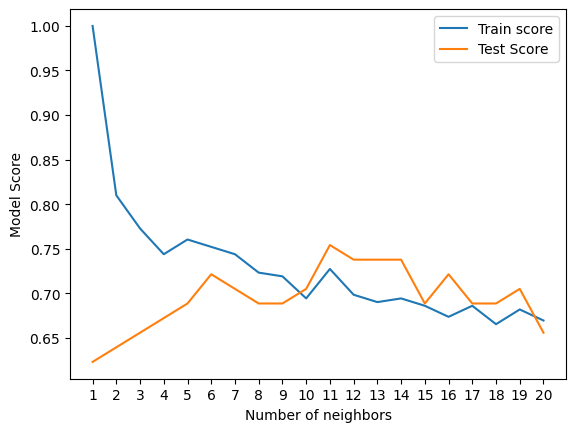

In [74]:
plt.plot(neighbours,train_score,label="Train score")
plt.plot(neighbours,test_score,label="Test Score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNn score on the test data: {max(test_score)*100:.2f}%")

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Hyperparameter tunning  with RandomisedSearchedCV 
We are going  to tune logistic regression model :
* lofistic Regression()
* RnadomForestClassifierr()

 ...... using RandomisedSearchCV

In [85]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# create a grid for randomforestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50)
        ,"max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


Now we got hyperparamter grid setp for each of our model,let's tune them using RandomisedSearchedCV...

In [86]:
# tune Logistic Regression
np.random.seed(42)
# setup random hyperparameter search for logisricRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                            n_iter=20,
                            verbose=True)
# fit the model
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [87]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [88]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we have tuned logistic regression lets do the same for RandomForestClassifier()

In [89]:
np.random.seed(42)

# setup for random forest classifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
#fit the model
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [90]:
# find the best parametrs
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [91]:
# Evaluate the ramdomisedClassifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

 * 1.by Hand
 * 2.RandommisedSearchedCV
 * 3.GridSearchCV

## Hyper parameter tining with grid search cv

Snice our logictics regression model provides the best scores so far,
we will try and then improve again using grid search cv


In [92]:
# diffferent hypeprparametrs for our logistic model 
lod_reg_grid ={"C":np.logspace(-4,4,30),
               "solver":["liblinear"],
                       }
# setyp grid hypeprparamets search for logisctic regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
# fit the model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [93]:
#check the best prams
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [94]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluation on tuned machine learning classifer, beyond accuracy
* ROC curve
* Confusion Matrix
* Classification Report
* Recall
* F1-score

  ... and will be good wgere cross validation was used where possible

  To make comparison and evaluate our trained model First we need to pridict 

In [95]:
#  amke prediction with tuned model
y_preds=gs_log_reg.predict(x_test)

In [96]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

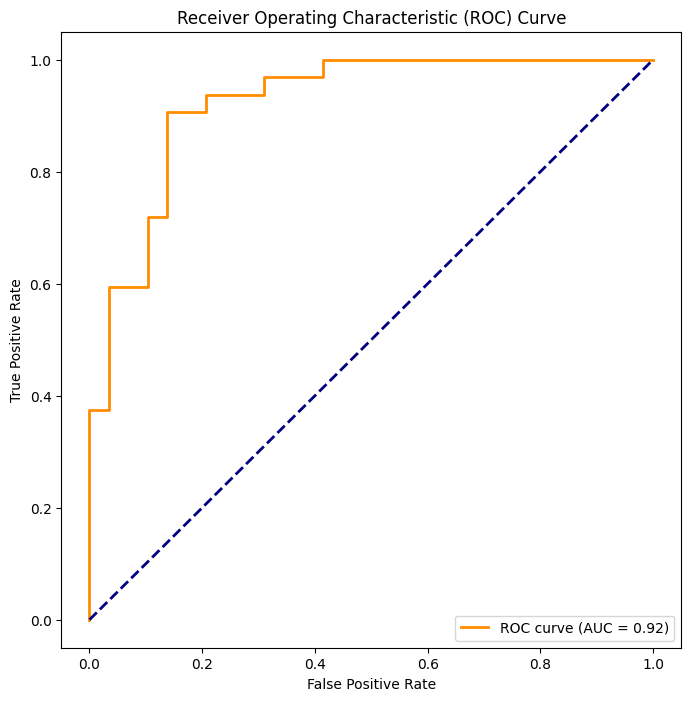

In [105]:

# Getting predicted probabilities for the positive class
y_scores = gs_log_reg.predict_proba(x_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [106]:
# confucion metrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


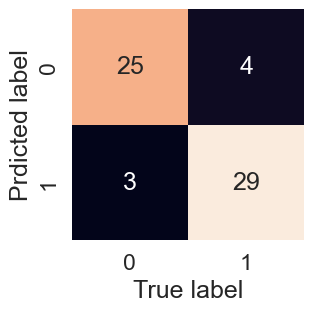

In [111]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plot a nice looking confusion matrix using seaborns's heat map
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Prdicted label")

plot_conf_mat(y_test,y_preds)

Now we have got a roc curve an auc matrix and a confusion  matrix lets get a classsification report as well as cross validated precision and f1 score

In [112]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Clalculate evaluation metrics using cross validation

we are going to calculate precision recall f1 score of our model using cross val score



In [113]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [132]:
clf=LogisticRegression(C=0.23357214690901212,
                      solver="liblinear")


In [133]:
 #Cross validated accuracy 
cv_acc=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [134]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [135]:
#Cross validated recall

cv_pre=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [136]:
# Cross validated recall
cv_recall=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [137]:
# Cross validated f1_score
cv_score=cross_val_score(clf,x,y,
                      cv=5,
                      scoring="f1")
cv_score=np.mean(cv_score)
cv_score

0.8705403543192143

<Axes: title={'center': 'Cross vaidated classification metrics'}>

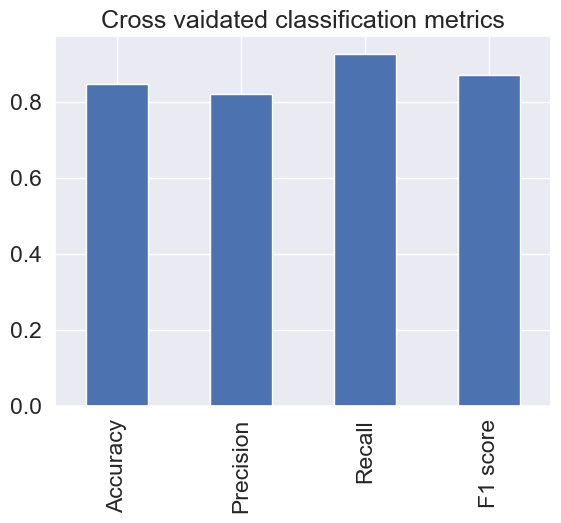

In [140]:
# visulaise cors validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_pre,
                        "Recall":cv_recall,
                        "F1 score":cv_score},index=[0])
cv_metrics.T.plot.bar(title="Cross vaidated classification metrics",
                   legend=False)

### Feature Importance
It is a way of asking "Which feature is impoprtant to the outcome of model and how did they contributed"

finding the feature is differnet for  each of the model

Lets find the feature  importance for our logistic regression model


In [142]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
# fit an instance of logistic regression 
gs_log_reg.best_params_
clf=LogisticRegression(C=0.23357214690901212,
                      solver="liblinear")
clf.fit(x_train,y_train);

In [144]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [153]:
feature_dict=dict(zip((df.columns),list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

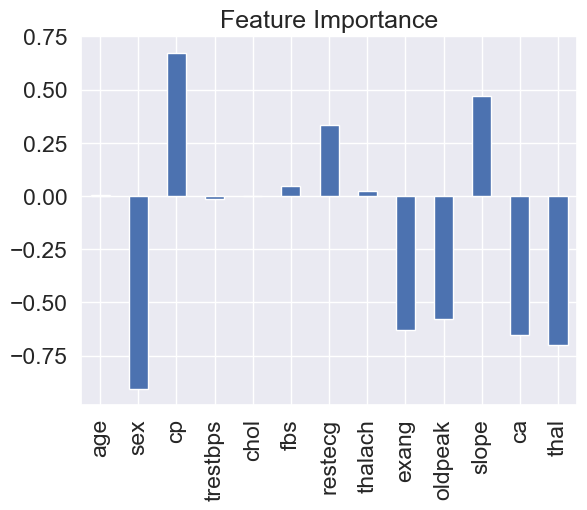

In [161]:
# visualise feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [164]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [166]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation
if you have not hit your goal yet
* could you collect  more data?
* could you try a better model ? like CatBoost XGBoost?
* could you improve the current models?(beyond what we  done so far)
* if your model is good enouogh you have youor evaluation mteric how could you  export it and share it with others
  